<a href="https://colab.research.google.com/github/UrsulaM25/ProyectoDSParteI_Macedo/blob/main/ProyectoDSParteI_Macedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Introducción

Analizar la demanda de energía eléctrica a lo largo del tiempo permite detectar tendencias, estacionalidades y crecimiento del consumo. Esta información es muy útil para la toma de decisiones.
Este análisis ayuda a gestionar la demanda de manera eficiente, prever picos de consumo y planificar en consecuencia reduciendo riesgos de desabastecimiento en distintas provincias.
Además, es de utilidad para diseñar y evaluar cambios en regulaciones o programas de incentivo de nuevas tecnologías, como tarifa diferencial por horarios o incentivos a la implementación de las energías renovables.

En base a este contexto, se seleccionó un dataframe que contiene datos de demanda de energía eléctrica de Argentina desde el año 2022 hasta febrero de 2025, los mismos provienen de la página de CAMMESA (organismo encargado de operar el mercado eléctrico mayorista de Argentina).
Sus columnas contienen los siguientes datos:


*   Año: año de demanda
*   mes: mes de demanda, formato mes-año
*   n° mes
*   n° día
*   Tipo de día: hábil, no hábil
*   día: Dia de la semana
*   fecha: formato día/mes/año
*   hora
*   Gran Usuario MEM: Demanda de grandes usuarios en MWh, la misma está compuesta por la demanda de la categoría GUMA (Gran Usuario Mayorista Autogenerador) como ejemplo se pueden mencionar las demandas de las empresas Arcor, Acindar, aysa, molinos cañuelas, ypf entre otras.  
*   Distribuidor (demanda estacional+GUMEs): La categoría distribuidor comprende la demanda en MWh de la demanda estacional y las GUMEs (Grandes Usuarios Menores) como ejemplo se pueden mencionar cooperativas, Edelap, Edenor, Edesur, EPEC entre otros.
*   DEMANDA LOCAL [MWh]: La demanda local es la suma de las demandas Gran Usuario MEM y Distribuidor (demanda estacional+GUMEs)
*   Demanda en MWh de las siguientes provincias: BUENOS AIRES, CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES, ENTRE RIOS,FORMOSA,JUJUY,LA PAMPA,LA RIOJA,MENDOZA,MISIONES,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SGO.DEL ESTERO,TUCUMAN










## 2.Definición de Hipótesis

Las hipótesis planteadas son las siguientes:

1.Analizar como ha variado la demanda total a lo largo de los años. Se estima que la demanda ha crecido a lo largo de los años debido al incremento de uso de artefactos eléctricos en el sector residencial.

2.Identificar la provincia con mayor demanda. Se estima que la provincia con mayor demanda es Buenos Aires debido a su población.

3.Identificar los picos de consumo para Buenos Aires en verano y en invierno en 2024.

4.Se estima que los días no hábiles presentan una menor demanda que los días hábiles.

## 3.Recoleccion y carga de datos

In [ ]:
#importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Libreria para visualizacion datos nulos
import missingno as msno

#Libreria para eliminar warnings
import warnings
warnings.filterwarnings('ignore')

#Libreria de Scikit-learn para imputacion
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split

#Configuraciones adicionales (opcional)
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/UrsulaM25/ProyectoDSParteI_Macedo/refs/heads/main/BaseDemandaDIARIA_EE_por_regionCVS.csv", delimiter=";")  # Especifico el delimitador y agrego el CSV

In [ ]:
df.head() #Visualizar df

,AÑO,MES,N° MES,N° DIA,TIPO DIA,DIA,FECHA,HORA,Gran Usuario MEM,DISTRIBUIDOR (demanda estacional+GUMEs),DEMANDA LOCAL [MWh],BUENOS AIRES,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRE RIOS,FORMOSA,JUJUY,LA PAMPA,LA RIOJA,MENDOZA,MISIONES,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SGO.DEL ESTERO,TUCUMAN
0,2022,ene-22,1,1,No Hábil,Sábado,1/1/2022,1,1.266,14.628,15.894,7.600,150,464,422.0,1.175,450,513,234,149,111,172,670.0,353,229,222,305,264,183,119,1.416,268,424
1,2022,ene-22,1,1,No Hábil,Sábado,1/1/2022,2,1.264,14.703,15.967,7.591,153,490,402.0,1.184,463,528,240,146,99,178,669.0,366,221,214,300,262,180,118,1.447,286,430
2,2022,ene-22,1,1,No Hábil,Sábado,1/1/2022,3,1.296,14.950,16.246,7.621,162,523,418.0,1.209,480,556,249,144,106,186,660.0,374,216,206,296,268,177,116,1.522,313,443
3,2022,ene-22,1,1,No Hábil,Sábado,1/1/2022,4,1.295,15.020,16.315,7.564,170,537,405.0,1.217,489,573,250,142,102,193,658.0,368,208,197,291,278,173,114,1.591,338,458
4,2022,ene-22,1,1,No Hábil,Sábado,1/1/2022,5,1.291,14.814,16.105,7.384,172,537,395.0,1.212,488,575,248,138,99,199,648.0,363,189,191,284,285,173,112,1.596,356,462


In [ ]:
df.shape #tamaño de dataframe

(27720, 33)

In [ ]:
df.size #Cantidad de datos

914760

In [ ]:
df.info () #Info df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   AÑO                                      27720 non-null  int64  
 1   MES                                      27720 non-null  object 
 2   N° MES                                   27720 non-null  int64  
 3   N° DIA                                   27720 non-null  int64  
 4   TIPO DIA                                 27720 non-null  object 
 5   DIA                                      27720 non-null  object 
 6   FECHA                                    27720 non-null  object 
 7   HORA                                     27720 non-null  int64  
 8   Gran Usuario MEM                         27720 non-null  float64
 9   DISTRIBUIDOR (demanda estacional+GUMEs)  27720 non-null  float64
 10  DEMANDA LOCAL [MWh]                      27720

## 4.Valores Nulos


*   Verificar valores nulos




In [ ]:

print("Valores Nulos por Columna:")
df.isnull().sum()

Valores Nulos por Columna:


,0
AÑO,0
MES,0
N° MES,0
N° DIA,0
TIPO DIA,0
DIA,0
FECHA,0
HORA,0
Gran Usuario MEM,0
DISTRIBUIDOR (demanda estacional+GUMEs),0


Se verifica que el df no tiene valores nulos

## 5.Formatos
  * Verificar formatos y/o aplicar cambios

In [ ]:
print(df.dtypes)  # Verificar el tipo de datos

AÑO                                          int64
MES                                         object
N° MES                                       int64
N° DIA                                       int64
TIPO DIA                                    object
DIA                                         object
FECHA                                       object
HORA                                         int64
Gran Usuario MEM                           float64
DISTRIBUIDOR (demanda estacional+GUMEs)    float64
DEMANDA LOCAL [MWh]                        float64
BUENOS AIRES                               float64
CATAMARCA                                    int64
CHACO                                        int64
CHUBUT                                     float64
CORDOBA                                    float64
CORRIENTES                                   int64
ENTRE RIOS                                   int64
FORMOSA                                      int64
JUJUY                          

Se cambian los tipos de datos enteros y la fecha

In [ ]:
df["FECHA"] = pd.to_datetime(df["FECHA"], format="%d/%m/%Y") #Cambiar tipo de dato de fecha a fecha

df.dtypes['FECHA']

dtype('<M8[ns]')

In [ ]:
columnas_a_convertir=['CATAMARCA','CHACO','CORRIENTES','ENTRE RIOS','FORMOSA','JUJUY', 'LA PAMPA', 'LA RIOJA', 'MISIONES','NEUQUEN','RIO NEGRO','SALTA','SAN JUAN','SAN LUIS','SANTA CRUZ','SGO.DEL ESTERO','TUCUMAN']

In [ ]:
df [columnas_a_convertir] = df [columnas_a_convertir].astype(float)

In [ ]:
print(df.dtypes)  # Verificar el tipo de datos

AÑO                                                 int64
MES                                                object
N° MES                                              int64
N° DIA                                              int64
TIPO DIA                                           object
DIA                                                object
FECHA                                      datetime64[ns]
HORA                                                int64
Gran Usuario MEM                                  float64
DISTRIBUIDOR (demanda estacional+GUMEs)           float64
DEMANDA LOCAL [MWh]                               float64
BUENOS AIRES                                      float64
CATAMARCA                                         float64
CHACO                                             float64
CHUBUT                                            float64
CORDOBA                                           float64
CORRIENTES                                        float64
ENTRE RIOS    

## 6.Eliminación y creacion de columnas


*  Nuevo DataFrame = df_con_ajuste



In [ ]:
# Eliminar una columna
# axis=1 indica que queremos eliminar una columna (axis=0 sería una fila)
df_con_ajuste1 = df.drop(['MES','N° DIA','DIA'], axis=1)

#Normalizo formatos
df_con_ajuste1['TIPO DIA'] = df_con_ajuste1['TIPO DIA'].replace({'No hábil':'No Hábil'})

# Renombrar columnas
df_con_ajuste = df_con_ajuste1.rename(columns={'DISTRIBUIDOR (demanda estacional+GUMEs)': 'DISTRIBUIDOR', 'DEMANDA LOCAL [MWh]': 'DEMANDALOCAL','Gran Usuario MEM':'GRANUSUARIO','TIPO DIA':'TIPODIA','BUENOS AIRES':'BUENOS_AIRES','N° MES':'NUMMES'})

print("\nDataFrame sin la columna 'MES','N° DIA', 'DIA':")
print(df_con_ajuste)
print("\nDataFrame original (no ha cambiado):")
print(df) # La columna sigue aquí


DataFrame sin la columna 'MES','N° DIA', 'DIA':
        AÑO  NUMMES   TIPODIA      FECHA  HORA  GRANUSUARIO  DISTRIBUIDOR  \
0      2022       1  No Hábil 2022-01-01     1        1.266        14.628   
1      2022       1  No Hábil 2022-01-01     2        1.264        14.703   
2      2022       1  No Hábil 2022-01-01     3        1.296        14.950   
3      2022       1  No Hábil 2022-01-01     4        1.295        15.020   
4      2022       1  No Hábil 2022-01-01     5        1.291        14.814   
...     ...     ...       ...        ...   ...          ...           ...   
27715  2025       2     Hábil 2025-02-28    20        2.227        17.518   
27716  2025       2     Hábil 2025-02-28    21        2.269        18.297   
27717  2025       2     Hábil 2025-02-28    22        2.149        18.135   
27718  2025       2     Hábil 2025-02-28    23        2.123        17.365   
27719  2025       2     Hábil 2025-02-28    24        2.149        16.553   

       DEMANDALOCAL  BUENO

In [ ]:
df_con_ajuste.head() #Visualizar df

,AÑO,NUMMES,TIPODIA,FECHA,HORA,GRANUSUARIO,DISTRIBUIDOR,DEMANDALOCAL,BUENOS_AIRES,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRE RIOS,FORMOSA,JUJUY,LA PAMPA,LA RIOJA,MENDOZA,MISIONES,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SGO.DEL ESTERO,TUCUMAN
0,2022,1,No Hábil,2022-01-01,1,1.266,14.628,15.894,7.600,150.0,464.0,422.0,1.175,450.0,513.0,234.0,149.0,111.0,172.0,670.0,353.0,229.0,222.0,305.0,264.0,183.0,119.0,1.416,268.0,424.0
1,2022,1,No Hábil,2022-01-01,2,1.264,14.703,15.967,7.591,153.0,490.0,402.0,1.184,463.0,528.0,240.0,146.0,99.0,178.0,669.0,366.0,221.0,214.0,300.0,262.0,180.0,118.0,1.447,286.0,430.0
2,2022,1,No Hábil,2022-01-01,3,1.296,14.950,16.246,7.621,162.0,523.0,418.0,1.209,480.0,556.0,249.0,144.0,106.0,186.0,660.0,374.0,216.0,206.0,296.0,268.0,177.0,116.0,1.522,313.0,443.0
3,2022,1,No Hábil,2022-01-01,4,1.295,15.020,16.315,7.564,170.0,537.0,405.0,1.217,489.0,573.0,250.0,142.0,102.0,193.0,658.0,368.0,208.0,197.0,291.0,278.0,173.0,114.0,1.591,338.0,458.0
4,2022,1,No Hábil,2022-01-01,5,1.291,14.814,16.105,7.384,172.0,537.0,395.0,1.212,488.0,575.0,248.0,138.0,99.0,199.0,648.0,363.0,189.0,191.0,284.0,285.0,173.0,112.0,1.596,356.0,462.0


In [ ]:
df_con_ajuste.shape #tamaño de dataframe

(27720, 30)

In [ ]:
df_con_ajuste.AÑO.value_counts()

,count
AÑO,
2024,8784
2022,8760
2023,8760
2025,1416


In [ ]:
# Muestra estadísticas descriptivas para las columnas numéricas
print("Estadísticas Descriptivas:")
df_con_ajuste.describe()

Estadísticas Descriptivas:


,AÑO,NUMMES,FECHA,HORA,GRANUSUARIO,DISTRIBUIDOR,DEMANDALOCAL,BUENOS_AIRES,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRE RIOS,FORMOSA,JUJUY,LA PAMPA,LA RIOJA,MENDOZA,MISIONES,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SGO.DEL ESTERO,TUCUMAN
count,27720.00000,27720.000000,27720,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2023.10303,6.264069,2023-08-01 00:00:00,12.500000,2.111914,13.991845,16.103759,7.914468,161.174062,378.616378,526.974964,192.156693,355.220382,456.343723,174.275505,130.683405,107.059091,188.137662,685.485425,309.729004,244.090115,239.022944,265.856494,283.836183,205.815440,132.838240,25.473076,226.115440,389.411400
min,2022.00000,1.000000,2022-01-01 00:00:00,1.000000,1.203000,7.735000,9.282000,3.828000,0.000000,172.000000,1.009000,1.000000,163.000000,235.000000,62.000000,0.000000,39.000000,0.000000,1.000000,15.000000,132.000000,109.000000,22.000000,1.000000,0.000000,2.000000,1.000000,60.000000,3.000000
25%,2022.00000,3.000000,2022-10-16 00:00:00,6.750000,1.988000,11.927750,13.976750,6.742000,136.000000,270.000000,468.000000,1.181000,273.000000,376.000000,119.000000,113.000000,89.000000,156.000000,611.000000,252.000000,221.000000,213.000000,227.000000,226.000000,177.000000,123.000000,1.291000,159.000000,318.000000
50%,2023.00000,6.000000,2023-08-01 00:00:00,12.500000,2.142000,13.602000,15.737500,7.735000,156.000000,333.000000,507.000000,1.349000,324.000000,437.000000,155.000000,128.000000,102.000000,182.000000,684.000000,306.000000,240.000000,236.000000,258.000000,266.000000,203.000000,132.000000,1.459000,197.000000,366.000000
75%,2024.00000,9.000000,2024-05-16 00:00:00,18.250000,2.249250,15.801250,17.943250,8.908000,183.000000,468.250000,550.000000,1.753000,425.000000,510.000000,224.000000,147.000000,117.000000,216.000000,757.000000,363.000000,265.000000,261.000000,300.000000,331.000000,231.000000,142.000000,1.693000,277.000000,443.000000
max,2025.00000,12.000000,2025-02-28 00:00:00,24.000000,2.698000,25.761000,28.095000,13.679000,283.000000,848.000000,982.000000,999.000000,742.000000,978.000000,357.000000,222.000000,262.000000,366.000000,999.000000,563.000000,413.000000,410.000000,465.000000,617.000000,369.000000,190.000000,999.000000,574.000000,844.000000
std,0.90920,3.540609,NaN,6.922311,0.197836,2.891914,2.935772,1.605704,33.502553,138.046175,95.483378,370.405347,110.214981,110.970061,64.855010,24.241079,26.808940,44.551475,126.771302,80.547842,33.616986,37.929337,52.788154,77.938414,40.483379,14.401597,148.178977,88.163632,101.403784


## 7.Crear Bases para visualizaciones

Para analizar el crecimiento de la demanda a lo largo de los años, se creara un df con la suma de la demanda local por año df_dlocal

In [ ]:
# Calcular la suma de demanda local por año

agregaciones_seleccion2 = {
    'DEMANDALOCAL': ['sum','mean'],

}

df_dlocal = df_con_ajuste.groupby('AÑO').agg(agregaciones_seleccion2)

df_dlocal.head()

DEMANDALOCAL           
              sum       mean
AÑO                         
2022   138775.247  15.841923
2023   140883.544  16.082596
2024   140219.402  15.963047
2025    26518.000  18.727401

Luego se eliminan los datos de 2025 ya que solamente tenemos los meses de enero y febrero

In [ ]:
# Eliminar una fila
# axis=1 indica que queremos eliminar una columna (axis=0 sería una fila)
df_dlocal_h2024 = df_dlocal.drop(2025, axis=0)


In [ ]:
df_dlocal_h2024.head()

DEMANDALOCAL           
              sum       mean
AÑO                         
2022   138775.247  15.841923
2023   140883.544  16.082596
2024   140219.402  15.963047

## 8.Verificacion de Hipótesis

## 8.1Hipótesis 1:
 Analizar como ha variado la demanda total a lo largo de los años.
*   Se estima que la demanda ha crecido a lo largo de los años debido al incremento de uso de artefactos eléctricos en el sector residencial.


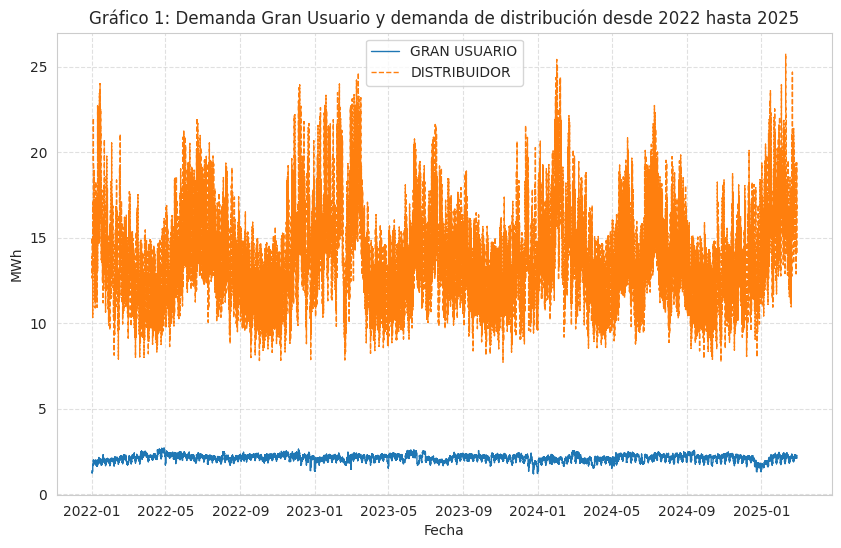

In [ ]:
#Representacion de los datos del df original para todos los años
fig,ax= plt.subplots(figsize=(10,6))
ax.plot(df_con_ajuste.FECHA, df_con_ajuste.GRANUSUARIO, label='GRAN USUARIO',linewidth=1)
ax.plot(df_con_ajuste.FECHA, df_con_ajuste.DISTRIBUIDOR, label='DISTRIBUIDOR',linewidth=1,linestyle='--')


ax.legend()
ax.grid()
ax.set_title('Gráfico 1: Demanda Gran Usuario y demanda de distribución desde 2022 hasta 2025')
ax.set_xlabel('Fecha')
ax.set_ylabel('MWh')

# Añadir una cuadrícula
ax.grid(True, linestyle='--', alpha=0.6) # Cuadrícula semitransparente

plt.show()


En el grafico 1 se puede observar que la demanda es estacional principalmente debido a la demanda en la distribución ya que sigue los patrones de consumo de la poblacion. La demanda de los grandes usuarios es estable a lo largo del tiempo.
También se puede observar que en los meses de verano se registran los mayores picos de consumo.


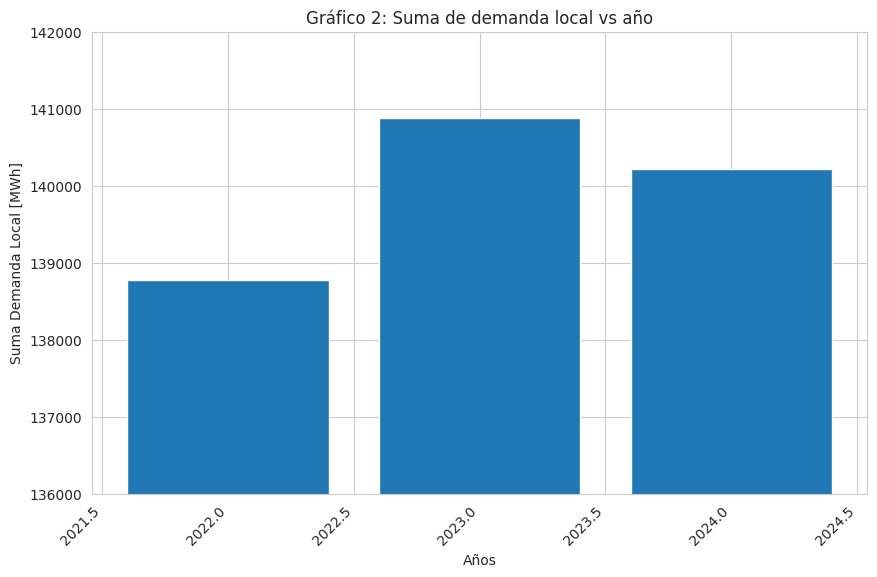

In [ ]:
# Datos
x = df_dlocal_h2024.index
y = df_dlocal_h2024['DEMANDALOCAL', 'sum']

# Crear figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de barras verticales
ax.bar(x, y)


# Etiquetas y título
ax.set_xlabel("Años")
ax.set_ylabel("Suma Demanda Local [MWh]")
ax.set_title("Gráfico 2: Suma de demanda local vs año")

# Establecer límites de los ejes para visualizar mejor el grafico
ax.set_ylim(136000,142000)

# Opcional: Rotar etiquetas del eje X si son largas
plt.xticks(rotation=45, ha='right') # Rotar 45 grados, alinear a la derecha

plt.show()

In [ ]:
df_dlocal_h2024.head()

DEMANDALOCAL           
              sum       mean
AÑO                         
2022   138775.247  15.841923
2023   140883.544  16.082596
2024   140219.402  15.963047

En el grafico 2 y la tabla continua se puede observar que la demanda local aumento en 2023 mas de lo que disminuyó en 2024.

# 8.2Hipótesis 2:
*   Identificar la provincia con mayor demanda. Se estima que la provincia con mayor demanda es Buenos Aires debido a su población.


In [ ]:
df_con_ajuste.head()

,AÑO,NUMMES,TIPODIA,FECHA,HORA,GRANUSUARIO,DISTRIBUIDOR,DEMANDALOCAL,BUENOS_AIRES,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRE RIOS,FORMOSA,JUJUY,LA PAMPA,LA RIOJA,MENDOZA,MISIONES,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SGO.DEL ESTERO,TUCUMAN
0,2022,1,No Hábil,2022-01-01,1,1.266,14.628,15.894,7.600,150.0,464.0,422.0,1.175,450.0,513.0,234.0,149.0,111.0,172.0,670.0,353.0,229.0,222.0,305.0,264.0,183.0,119.0,1.416,268.0,424.0
1,2022,1,No Hábil,2022-01-01,2,1.264,14.703,15.967,7.591,153.0,490.0,402.0,1.184,463.0,528.0,240.0,146.0,99.0,178.0,669.0,366.0,221.0,214.0,300.0,262.0,180.0,118.0,1.447,286.0,430.0
2,2022,1,No Hábil,2022-01-01,3,1.296,14.950,16.246,7.621,162.0,523.0,418.0,1.209,480.0,556.0,249.0,144.0,106.0,186.0,660.0,374.0,216.0,206.0,296.0,268.0,177.0,116.0,1.522,313.0,443.0
3,2022,1,No Hábil,2022-01-01,4,1.295,15.020,16.315,7.564,170.0,537.0,405.0,1.217,489.0,573.0,250.0,142.0,102.0,193.0,658.0,368.0,208.0,197.0,291.0,278.0,173.0,114.0,1.591,338.0,458.0
4,2022,1,No Hábil,2022-01-01,5,1.291,14.814,16.105,7.384,172.0,537.0,395.0,1.212,488.0,575.0,248.0,138.0,99.0,199.0,648.0,363.0,189.0,191.0,284.0,285.0,173.0,112.0,1.596,356.0,462.0


In [ ]:
provincias=['BUENOS_AIRES','CATAMARCA','CHACO','CHUBUT','CORDOBA','CORRIENTES','ENTRE RIOS','FORMOSA','JUJUY', 'LA PAMPA', 'LA RIOJA','MENDOZA', 'MISIONES','NEUQUEN','RIO NEGRO','SALTA','SAN JUAN','SAN LUIS','SANTA CRUZ','SANTA FE','SGO.DEL ESTERO','TUCUMAN']


In [ ]:
df_demanda_total_provincias = df_con_ajuste[provincias].sum()
df_demanda_total_provincias.head()

,0
BUENOS_AIRES,2.193891e+05
CATAMARCA,4.467745e+06
CHACO,1.049525e+07
CHUBUT,1.460775e+07
CORDOBA,5.326584e+06


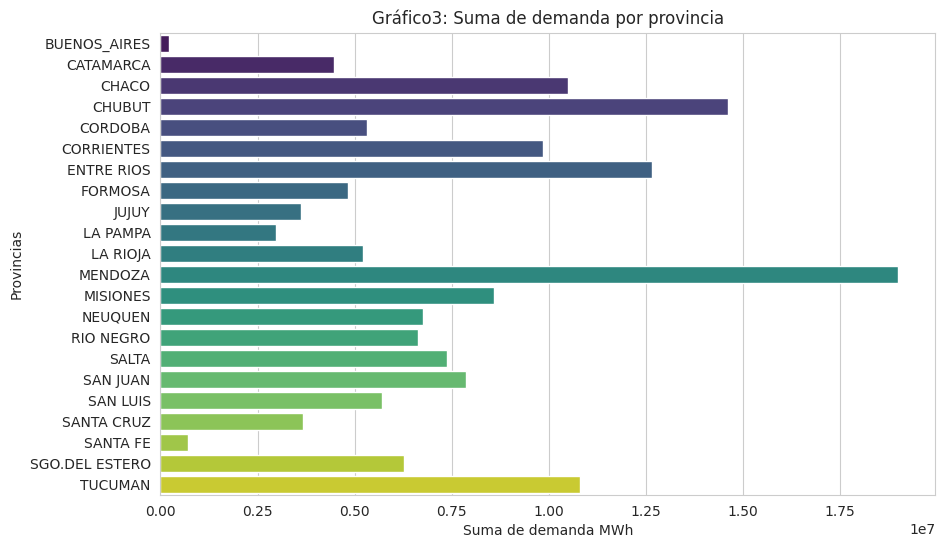

In [ ]:
# Barplot: Suma de demanda por provincia
plt.figure(figsize=(10, 6))
sns.barplot( x= df_demanda_total_provincias.values, y=df_demanda_total_provincias.index, ci='sd', palette='viridis') # ci='sd' muestra desviación estándar
plt.title('Gráfico3: Suma de demanda por provincia')
plt.xlabel('Suma de demanda MWh')
plt.ylabel('Provincias')
plt.show()

En el gráfico 3 se puede observar que la provincia con mayor demanda es Mendoza

# 8.3 Hipótesis 3:
*  Identificar los picos de consumo para Buenos Aires en verano y en invierno en 2024.

In [ ]:
df_con_ajuste.head()

,AÑO,NUMMES,TIPODIA,FECHA,HORA,GRANUSUARIO,DISTRIBUIDOR,DEMANDALOCAL,BUENOS_AIRES,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRE RIOS,FORMOSA,JUJUY,LA PAMPA,LA RIOJA,MENDOZA,MISIONES,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SGO.DEL ESTERO,TUCUMAN
0,2022,1,No Hábil,2022-01-01,1,1.266,14.628,15.894,7.600,150.0,464.0,422.0,1.175,450.0,513.0,234.0,149.0,111.0,172.0,670.0,353.0,229.0,222.0,305.0,264.0,183.0,119.0,1.416,268.0,424.0
1,2022,1,No Hábil,2022-01-01,2,1.264,14.703,15.967,7.591,153.0,490.0,402.0,1.184,463.0,528.0,240.0,146.0,99.0,178.0,669.0,366.0,221.0,214.0,300.0,262.0,180.0,118.0,1.447,286.0,430.0
2,2022,1,No Hábil,2022-01-01,3,1.296,14.950,16.246,7.621,162.0,523.0,418.0,1.209,480.0,556.0,249.0,144.0,106.0,186.0,660.0,374.0,216.0,206.0,296.0,268.0,177.0,116.0,1.522,313.0,443.0
3,2022,1,No Hábil,2022-01-01,4,1.295,15.020,16.315,7.564,170.0,537.0,405.0,1.217,489.0,573.0,250.0,142.0,102.0,193.0,658.0,368.0,208.0,197.0,291.0,278.0,173.0,114.0,1.591,338.0,458.0
4,2022,1,No Hábil,2022-01-01,5,1.291,14.814,16.105,7.384,172.0,537.0,395.0,1.212,488.0,575.0,248.0,138.0,99.0,199.0,648.0,363.0,189.0,191.0,284.0,285.0,173.0,112.0,1.596,356.0,462.0


In [ ]:
#Se crea df con la demanda de Bs As para el año 2024
df_buenos_aires=df_con_ajuste[['AÑO','NUMMES','HORA','FECHA','BUENOS_AIRES']]
df_buenos_aires.head()

,AÑO,NUMMES,HORA,FECHA,BUENOS_AIRES
0,2022,1,1,2022-01-01,7.600
1,2022,1,2,2022-01-01,7.591
2,2022,1,3,2022-01-01,7.621
3,2022,1,4,2022-01-01,7.564
4,2022,1,5,2022-01-01,7.384


In [ ]:
#Se filtra demanda de verano para 2024 para Buenos Aires
df_verano_buenos_aires = df_buenos_aires[
    (df_buenos_aires['AÑO'] == 2024) &
    (df_buenos_aires['NUMMES'].isin([12, 1, 2]))
]
df_verano_buenos_aires.head()

,AÑO,NUMMES,HORA,FECHA,BUENOS_AIRES
17520,2024,1,1,2024-01-01,5.959
17521,2024,1,2,2024-01-01,5.892
17522,2024,1,3,2024-01-01,5.806
17523,2024,1,4,2024-01-01,5.651
17524,2024,1,5,2024-01-01,5.495


In [ ]:
#Se filtra demanda de invierno para 2024 para Buenos Aires
df_invierno_buenos_aires = df_buenos_aires[
    (df_buenos_aires['AÑO'] == 2024) &
    (df_buenos_aires['NUMMES'].isin([6, 7, 8]))
]
df_invierno_buenos_aires.head()

,AÑO,NUMMES,HORA,FECHA,BUENOS_AIRES
21168,2024,6,1,2024-06-01,8.211
21169,2024,6,2,2024-06-01,7.549
21170,2024,6,3,2024-06-01,7.059
21171,2024,6,4,2024-06-01,6.854
21172,2024,6,5,2024-06-01,6.703


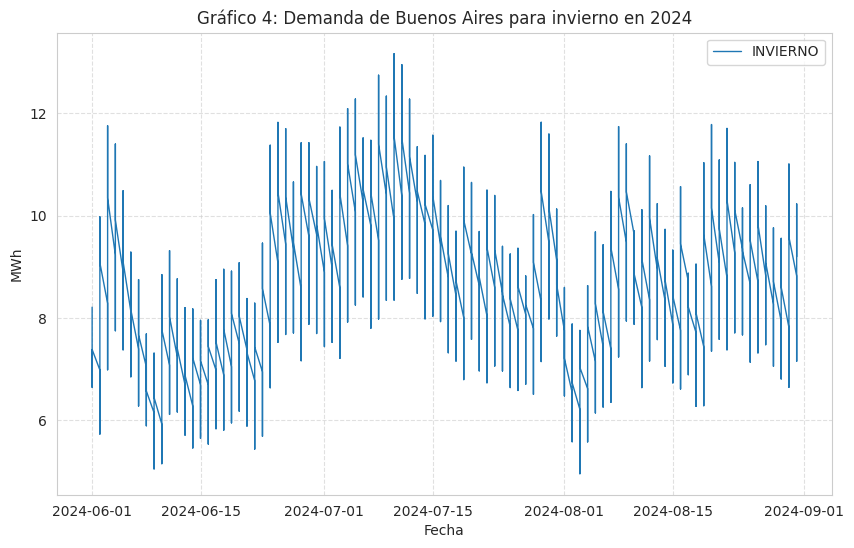

In [ ]:
#Representacion de la demanda de invierno en Bs As
fig,ax= plt.subplots(figsize=(10,6))
ax.plot(df_invierno_buenos_aires.FECHA, df_invierno_buenos_aires.BUENOS_AIRES, label='INVIERNO',linewidth=1)
ax.legend()
ax.grid()
ax.set_title('Gráfico 4: Demanda de Buenos Aires para invierno en 2024')
ax.set_xlabel('Fecha')
ax.set_ylabel('MWh')

# Añadir una cuadrícula
ax.grid(True, linestyle='--', alpha=0.6) # Cuadrícula semitransparente

plt.show()

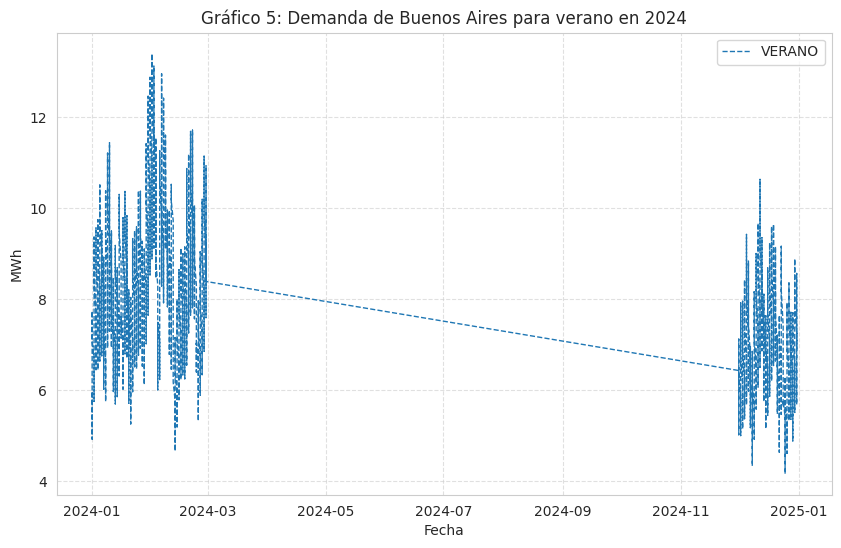

In [ ]:
#Representacion de la demanda de verano en Bs As
fig,ax= plt.subplots(figsize=(10,6))
ax.plot(df_verano_buenos_aires.FECHA, df_verano_buenos_aires.BUENOS_AIRES, label='VERANO',linewidth=1,linestyle='--')


ax.legend()
ax.grid()
ax.set_title('Gráfico 5: Demanda de Buenos Aires para verano en 2024')
ax.set_xlabel('Fecha')
ax.set_ylabel('MWh')

# Añadir una cuadrícula
ax.grid(True, linestyle='--', alpha=0.6) # Cuadrícula semitransparente

plt.show()

Visualizando los gráficos 4 y 5 se pueden distinguir los dias  de mayor y menor consumo para verano e invierno para Bs As en 2024

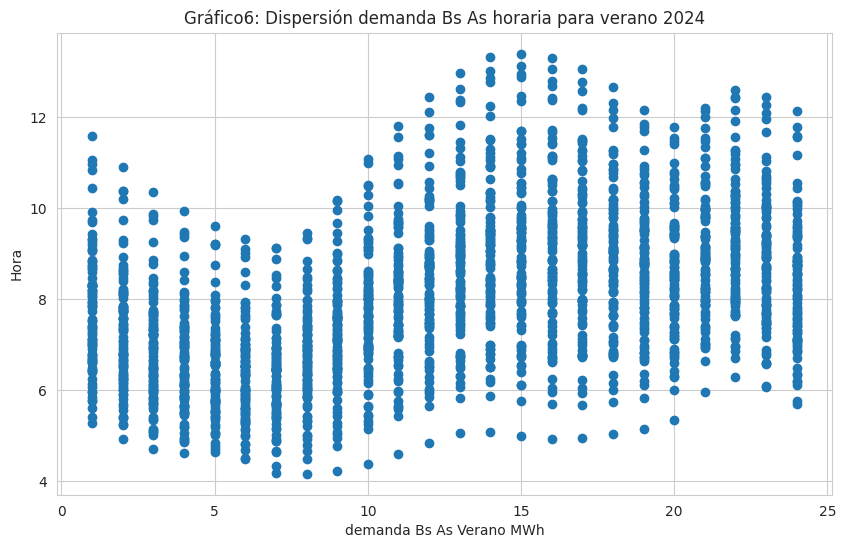

In [ ]:
#Visualizamos la dispersion de datos de demanda de verano para Bs AS 2024
y_scatter = df_verano_buenos_aires['BUENOS_AIRES']
x_scatter = df_verano_buenos_aires['HORA']

# Crear figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de dispersión
ax.scatter(x_scatter, y_scatter)

# Etiquetas y título
ax.set_xlabel("demanda Bs As Verano MWh")
ax.set_ylabel("Hora")
ax.set_title("Gráfico6: Dispersión demanda Bs As horaria para verano 2024")

plt.show()

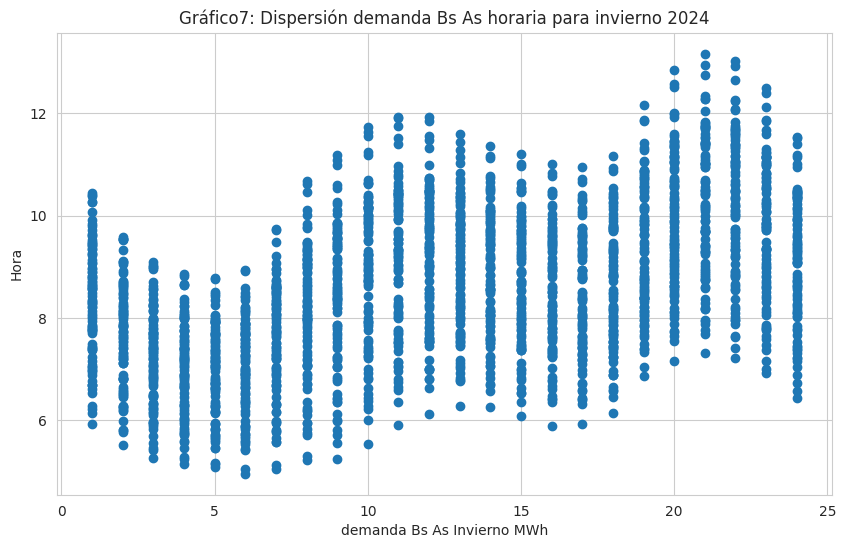

In [ ]:
#Visualizamos la dispersion de datos de demanda de invierno para Bs AS 2024
y_scatter = df_invierno_buenos_aires['BUENOS_AIRES']
x_scatter = df_invierno_buenos_aires['HORA']

# Crear figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de dispersión
ax.scatter(x_scatter, y_scatter)

# Etiquetas y título
ax.set_xlabel("demanda Bs As Invierno MWh")
ax.set_ylabel("Hora")
ax.set_title("Gráfico7: Dispersión demanda Bs As horaria para invierno 2024")

plt.show()

En los gráficos 6 y 7 se observa que los puntos van cambiando a lo largo del dia. Dependiendo si es invierno o verano.

#8.4 Hipótesis 4:
*   Se estima que los días no hábiles presentan una menor demanda que los días hábiles.

In [ ]:
df_con_ajuste.head()

,AÑO,NUMMES,TIPODIA,FECHA,HORA,GRANUSUARIO,DISTRIBUIDOR,DEMANDALOCAL,BUENOS_AIRES,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRE RIOS,FORMOSA,JUJUY,LA PAMPA,LA RIOJA,MENDOZA,MISIONES,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SGO.DEL ESTERO,TUCUMAN
0,2022,1,No Hábil,2022-01-01,1,1.266,14.628,15.894,7.600,150.0,464.0,422.0,1.175,450.0,513.0,234.0,149.0,111.0,172.0,670.0,353.0,229.0,222.0,305.0,264.0,183.0,119.0,1.416,268.0,424.0
1,2022,1,No Hábil,2022-01-01,2,1.264,14.703,15.967,7.591,153.0,490.0,402.0,1.184,463.0,528.0,240.0,146.0,99.0,178.0,669.0,366.0,221.0,214.0,300.0,262.0,180.0,118.0,1.447,286.0,430.0
2,2022,1,No Hábil,2022-01-01,3,1.296,14.950,16.246,7.621,162.0,523.0,418.0,1.209,480.0,556.0,249.0,144.0,106.0,186.0,660.0,374.0,216.0,206.0,296.0,268.0,177.0,116.0,1.522,313.0,443.0
3,2022,1,No Hábil,2022-01-01,4,1.295,15.020,16.315,7.564,170.0,537.0,405.0,1.217,489.0,573.0,250.0,142.0,102.0,193.0,658.0,368.0,208.0,197.0,291.0,278.0,173.0,114.0,1.591,338.0,458.0
4,2022,1,No Hábil,2022-01-01,5,1.291,14.814,16.105,7.384,172.0,537.0,395.0,1.212,488.0,575.0,248.0,138.0,99.0,199.0,648.0,363.0,189.0,191.0,284.0,285.0,173.0,112.0,1.596,356.0,462.0


In [ ]:
df_con_ajuste.TIPODIA.value_counts()

,count
TIPODIA,
Hábil,18696
No Hábil,9024


In [ ]:
df_con_ajuste.TIPODIA.unique()

array(['No Hábil', 'Hábil'], dtype=object)

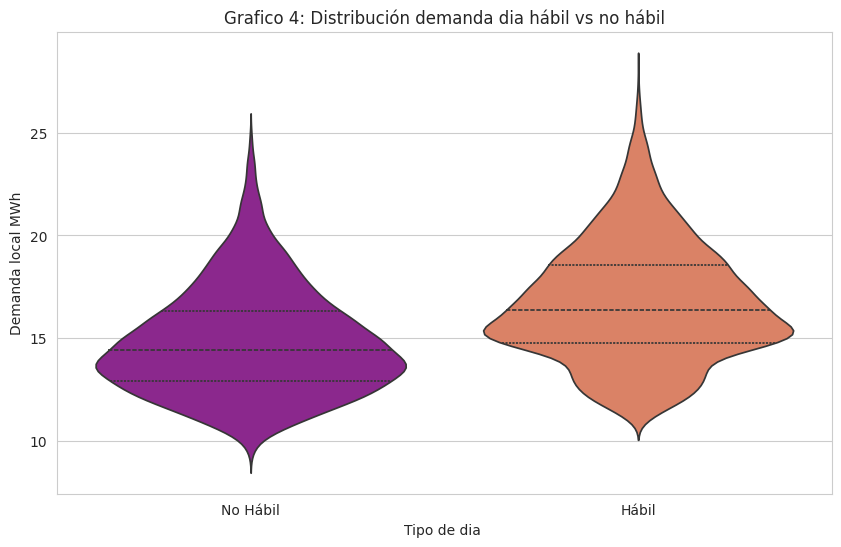

In [ ]:
# Violinplot: Distribución demanda dia hábil vs no hábil
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_con_ajuste, x='TIPODIA', y='DEMANDALOCAL', palette='plasma', inner='quartile') # inner='quartile' muestra los cuartiles dentro
plt.title('Grafico 4: Distribución demanda dia hábil vs no hábil')
plt.xlabel('Tipo de dia ')
plt.ylabel('Demanda local MWh')
plt.show()

En el gráfico 4 se observa que la demanda en los dias habiles es mas variable. La distribución de la demanda es mas simétrica y compacta en los días no hábiles. También se puede observar que la demanda local es mayor en los dias hábiles que en los no hábiles


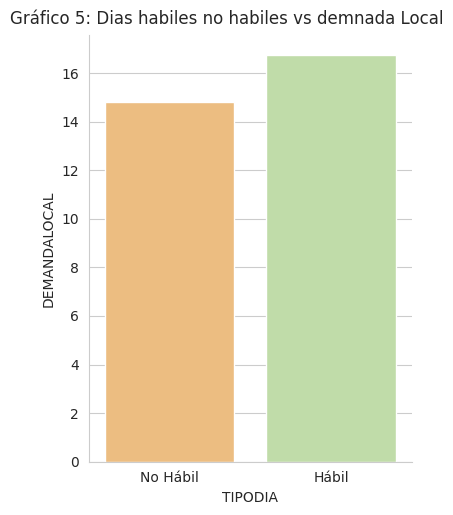

In [ ]:
# Catplot
sns.catplot(data=df_con_ajuste, x='TIPODIA', y='DEMANDALOCAL', kind='bar', height=5, aspect=0.8, palette='Spectral', ci=None) # kind='bar' especifica barplot, ci=None quita las barras de error
plt.suptitle('Gráfico 5: Dias habiles no habiles vs demnada Local', y=1.02)
plt.show()

En el gráfico 5 se observa que la demanda en los dias habiles es mayor que la demanda en los dias no hábiles